## Analysis of Physical Activity 

The following analysis is in compliance with the checked rules below obtained from [Ten simple rules for writing and sharing computational analyses in Jupyter Notebooks](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007007):

- [x] Tell a story (commented write-up)
- [x] Document the process, not just the results (commented write-up)
- [x] Use cell divisions to make steps clear (used multiple cells)
- [x] Modularize code (lat_to_y function)
- [x] Record dependencies (import statements)
- [x] Use version control (https://github.com/rlieu002/521_assignment4/blob/master/assignment4.ipynb)
- [ ] Build a pipeline
- [ ] Share and explain your data
- [ ] Design your notebooks to be read, run, and explored
- [ ] Advocate for open research

   Air Power  Cadence  Form Power  Ground Time  Leg Spring Stiffness  Power  \
0        NaN      NaN         NaN          NaN                   NaN    NaN   
1        NaN      NaN         NaN          NaN                   NaN    NaN   
2        NaN      NaN         NaN          NaN                   NaN    NaN   
3        NaN      NaN         NaN          NaN                   NaN    NaN   
4        NaN      NaN         NaN          NaN                   NaN    NaN   

   Vertical Oscillation  altitude  cadence                      datafile  ...  \
0                   NaN       NaN      0.0  activities/2675855419.fit.gz  ...   
1                   NaN       NaN      0.0  activities/2675855419.fit.gz  ...   
2                   NaN       NaN     54.0  activities/2675855419.fit.gz  ...   
3                   NaN    3747.0     77.0  activities/2675855419.fit.gz  ...   
4                   NaN    3798.0     77.0  activities/2675855419.fit.gz  ...   

   fractional_cadence  heart_rate  pos

Text(0.5, 0, 'Time (Seconds)')

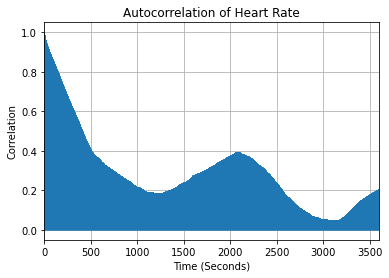

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


# create dataframe from csv file using pandas
df = pd.read_csv('../assets/strava.csv')

# We can evaluate the autocorrelation of heart rate, which is the correlation
# of heart rate to a delayed copy of itself, to determine whether there is 
# a periodic trend or other repeating patterns. 

# convert timestamp string to python datetime
df['Datetime'] = pd.to_datetime(df['timestamp'])

print(df.head())

# normalize data
x = df['heart_rate'].fillna(0) - df['heart_rate'].mean()

# manual autocorrelation using numpy (for reference only)
# autocorr = np.correlate(x, x, mode='full')
# autocorr = autocorr[x.size:]
# autocorr /= autocorr.max()
# plt.plot(autocorr)

# plot autocorrelation using acorr function
plt.gca().acorr(x, maxlags=3600)
plt.gca().grid(True)
plt.gca().set_xlim(0, 3600)
plt.gca().set_title('Autocorrelation of Heart Rate')
plt.gca().set_ylabel('Correlation')
plt.gca().set_xlabel('Time (Seconds)')

# Exmaining the graph, we see that the correlation starts high and decreases over time. 
# This is consistent with my expectation as I believe that physical exertion impacts
# heart rate rather than a period trends. 

Text(0.5, 0, 'Altitude')

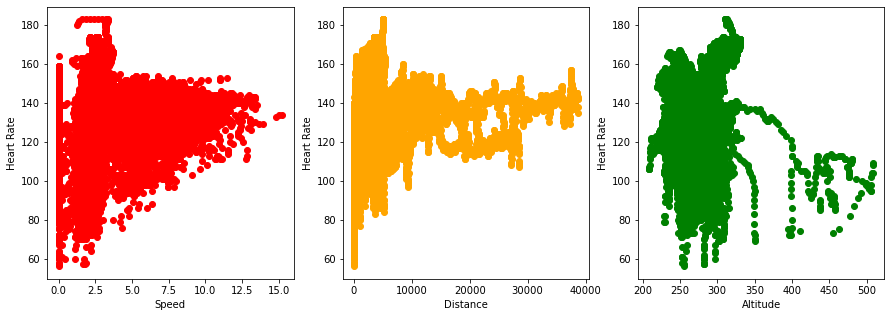

In [2]:
plt.close()

# We can evaluate the correlation between specific variables against heart rate
# by creating a scatterplot with heart rate as the dependent (y-axis) variable. 
# By looking at the plots (or calculating the best fit regression line), we see 
# whether there is a strong or weak, positive or negative correlation. 

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.scatter(df['enhanced_speed'], df['heart_rate'], c='red')
ax1.set_ylabel('Heart Rate')
ax1.set_xlabel('Speed')
ax2.scatter(df['distance'], df['heart_rate'], c='orange')
ax2.set_ylabel('Heart Rate')
ax2.set_xlabel('Distance')
ax3.scatter(df['enhanced_altitude'], df['heart_rate'], c='green')
ax3.set_ylabel('Heart Rate')
ax3.set_xlabel('Altitude')

# Speed seems to have a strong positive correlation with heart rate.
# The observations lying in the upper left side (low speed and high
# heart rate) can be explained by short breaks while heart rate
# remains high (perhaps when waiting for traffic). 

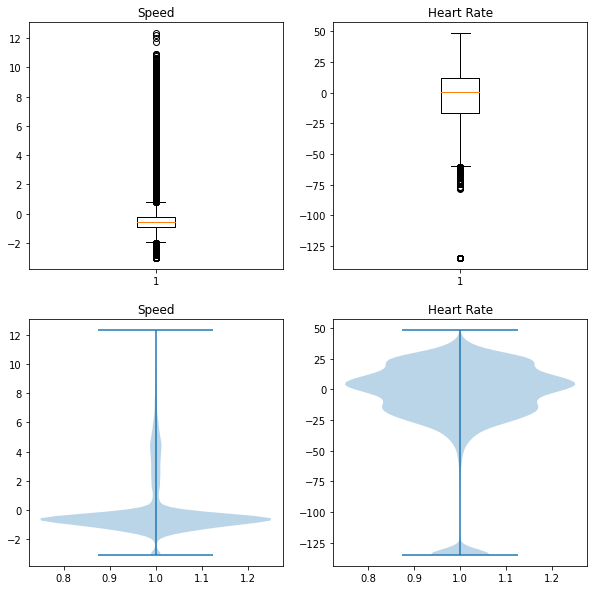

In [3]:
plt.close()

# We can evaluate the distribution of variables such as speed and heart rate.
# This allows us to examine information such as the mean, variance, and outliers
# as well as classify or compare it to other ditributions.

# normalize data
speed = df['enhanced_speed'].fillna(0) - df['enhanced_speed'].mean()
rate = df['heart_rate'].fillna(0) - df['heart_rate'].mean()

fig, (ax1, ax2) = plt.subplots(2,2,figsize=(10,10))
ax1[0].boxplot(speed)
ax1[0].title.set_text('Speed')
ax1[1].boxplot(rate)
ax1[1].title.set_text('Heart Rate')
ax2[0].violinplot(speed)
ax2[0].title.set_text('Speed')
ax2[1].violinplot(rate)
ax2[1].title.set_text('Heart Rate')

# The distributions for speed and heart rate are consistent with expectations.
# The speed stays close to the mean as shown by the narrow box while the
# outlying dots show momentary busrts of speed. 
    
# Heart rate has a much wider range as shown by the gap between the first
# and third quartiles while the outliers represent resting heart rate. 

Text(0.5, 0, 'Altitude')

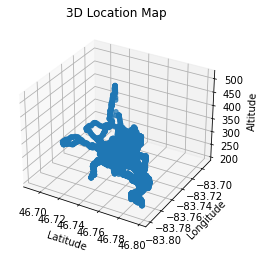

In [4]:
from mpl_toolkits import mplot3d
import math

plt.close()

# Just to satisfy our visual curiosity, we can create a 3D map using the
# latitude, longitude, and altitude as the x, y, and z axes, respectively.

def lat_to_y(a):
    return 180.0 / math.pi * math.log(math.tan(math.pi/4.0+a*(math.pi/180.0)/2.0))

df['lat_degrees'] = df['position_lat'].dropna() * (180 / 2**31)
df['lat_degrees'] = df['lat_degrees'].apply(lat_to_y)
df['long_degrees'] = df['position_long'].dropna() * (180 / 2**31)

# filter data for outliers
df = df[df['lat_degrees'] > 0]
df = df[df['lat_degrees'] < 47]
df = df[df['long_degrees'] > -83.8]
df = df[df['long_degrees'] < 0]
df = df[df['enhanced_altitude'] > 0]

ax = plt.axes(projection='3d')
ax.scatter3D(df['lat_degrees'], df['long_degrees'], df['enhanced_altitude'])
ax.title.set_text('3D Location Map')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Altitude')
